In [1]:
#### Cell 01 Load the orignal Dataset
import torch

# Load the original dataset
data_path = "dataset/ieee24/ieee24/processed_r/data.pt"  # Replace with the actual path to your data.pt file
data, metadata = torch.load(data_path)

# Inspect dataset and metadata
print(f"Data contains {len(metadata['idx']) - 1} states.")  # Number of states
print(f"Edge Index Shape: {data.edge_index.shape}")
print(f"Node Features Shape: {data.x.shape}")
print(f"Edge Attributes Shape: {data.edge_attr.shape}")
print("--- Metadata ---")
print(f"Metadata Keys: {list(metadata.keys())}")
print(f"Metadata[idx]: {metadata['idx'][:10]}")  # First 10 state indices
print(f"Metadata[x]: {metadata['x'][:10]}")  # First 10 node indices
print(f"Metadata[edge_attr]: {metadata['edge_attr'][:10]}")  # First 10 edge_attr indices

# Check a specific state (e.g., state 0)
state_index = 0
start_edge = metadata['edge_index'][state_index].item()
end_edge = metadata['edge_index'][state_index + 1].item()
edges_state_0 = data.edge_index[:, start_edge:end_edge]

start_node = metadata['x'][state_index].item()
end_node = metadata['x'][state_index + 1].item()
nodes_state_0 = data.x[start_node:end_node]

print(f"State 0 - Number of Edges: {edges_state_0.shape[1]}")
print(f"State 0 - Number of Nodes: {nodes_state_0.shape[0]}")
print(f"State 0 - Edges: {edges_state_0}")
print(f"State 0 - Node Features: {nodes_state_0}")


/var/tmp/pbs.54572.bright04/ipykernel_2061959/1183406704.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data, metadata = torch.load(data_path)


Data contains 21500 states.
Edge Index Shape: torch.Size([2, 1585800])
Node Features Shape: torch.Size([516000, 3])
Edge Attributes Shape: torch.Size([1585800, 4])
--- Metadata ---
Metadata Keys: ['x', 'edge_index', 'edge_attr', 'y', 'edge_mask', 'idx']
Metadata[idx]: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Metadata[x]: tensor([  0,  24,  48,  72,  96, 120, 144, 168, 192, 216])
Metadata[edge_attr]: tensor([  0,  74, 148, 222, 296, 370, 444, 518, 592, 666])
State 0 - Number of Edges: 74
State 0 - Number of Nodes: 24
State 0 - Edges: tensor([[ 0,  0,  0,  1,  1,  2,  2,  3,  4,  5,  6,  7,  7,  8,  8,  9,  9, 10,
         10, 11, 11, 12, 13, 14, 14, 14, 14, 15, 15, 16, 16, 17, 18, 18, 19, 19,
         20,  1,  2,  4,  3,  5,  8, 23,  8,  9,  9,  7,  8,  9, 10, 11, 10, 11,
         12, 13, 12, 22, 22, 15, 15, 20, 20, 23, 16, 18, 17, 21, 20, 19, 19, 22,
         22, 21],
        [ 1,  2,  4,  3,  5,  8, 23,  8,  9,  9,  7,  8,  9, 10, 11, 10, 11, 12,
         13, 12, 22, 22, 15, 15, 20, 20,

In [14]:

# Extract edges for State 0 and State 1 from the dataset
state_index_0 = 0
state_index_1 = 1
state_index_2 = 2

state_0_edges = data.edge_index[:, metadata['edge_index'][state_index_0]:metadata['edge_index'][state_index_0 + 1]]
state_1_edges = data.edge_index[:, metadata['edge_index'][state_index_1]:metadata['edge_index'][state_index_1 + 1]]
state_2_edges = data.edge_index[:, metadata['edge_index'][state_index_2]:metadata['edge_index'][state_index_2 + 1]]


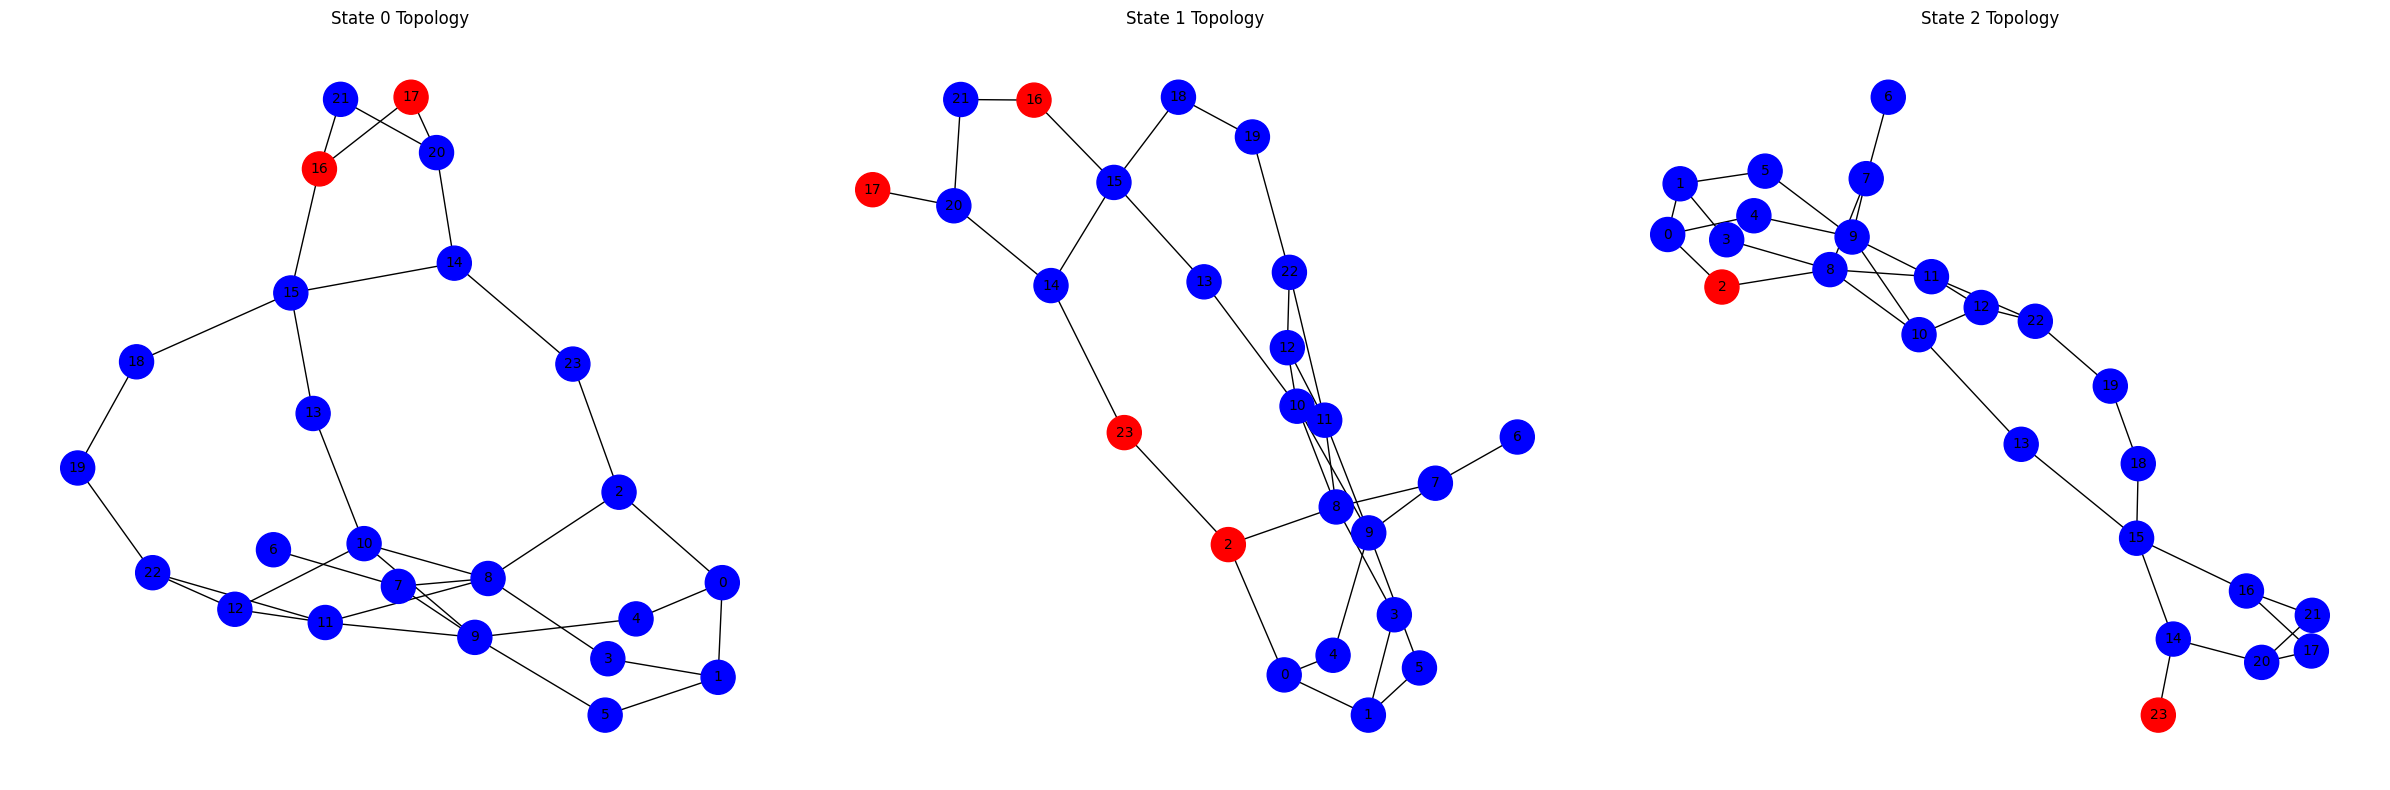

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges):
    """
    Visualize State 0, State 1, and State 2 topologies side by side, highlighting missing edges.
    Args:
        state_0_edges: Edge list for State 0.
        state_1_edges: Edge list for State 1.
        state_2_edges: Edge list for State 2.
    """
    # Create graphs for each state
    graph_0 = nx.Graph()
    graph_0.add_edges_from(state_0_edges)

    graph_1 = nx.Graph()
    graph_1.add_edges_from(state_1_edges)

    graph_2 = nx.Graph()
    graph_2.add_edges_from(state_2_edges)

    # Compute missing edges between consecutive states
    missing_edges_01 = [edge for edge in state_0_edges if edge not in state_1_edges]
    missing_edges_12 = [edge for edge in state_1_edges if edge not in state_2_edges]

    # Identify nodes involved in missing edges for each transition
    missing_nodes_01 = set(node for edge in missing_edges_01 for node in edge)
    missing_nodes_12 = set(node for edge in missing_edges_12 for node in edge)

    # Define node colors for each state
    node_colors_0 = ['red' if node in missing_nodes_01 else 'blue' for node in graph_0.nodes]
    node_colors_1 = ['red' if node in missing_nodes_01 or node in missing_nodes_12 else 'blue' for node in graph_1.nodes]
    node_colors_2 = ['red' if node in missing_nodes_12 else 'blue' for node in graph_2.nodes]

    # Create a side-by-side plot
    plt.figure(figsize=(24, 8))

    # Plot State 0
    plt.subplot(1, 3, 1)
    nx.draw(graph_0, with_labels=True, node_color=node_colors_0, edge_color="black", node_size=600, font_size=10)
    plt.title("State 0 Topology")

    # Plot State 1
    plt.subplot(1, 3, 2)
    nx.draw(graph_1, with_labels=True, node_color=node_colors_1, edge_color="black", node_size=600, font_size=10)
    plt.title("State 1 Topology")

    # Plot State 2
    plt.subplot(1, 3, 3)
    nx.draw(graph_2, with_labels=True, node_color=node_colors_2, edge_color="black", node_size=600, font_size=10)
    plt.title("State 2 Topology")

    # Show the plots
    plt.tight_layout()
    plt.show()


# Edge extraction from the dataset
state_index_0 = 0
state_index_1 = 1
state_index_2 = 2

# Extract edges for each state
state_0_edges = data.edge_index[:, metadata['edge_index'][state_index_0]:metadata['edge_index'][state_index_0 + 1]].t().tolist()
state_1_edges = data.edge_index[:, metadata['edge_index'][state_index_1]:metadata['edge_index'][state_index_1 + 1]].t().tolist()
state_2_edges = data.edge_index[:, metadata['edge_index'][state_index_2]:metadata['edge_index'][state_index_2 + 1]].t().tolist()

# Visualize all three states with missing edges highlighted
plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges)


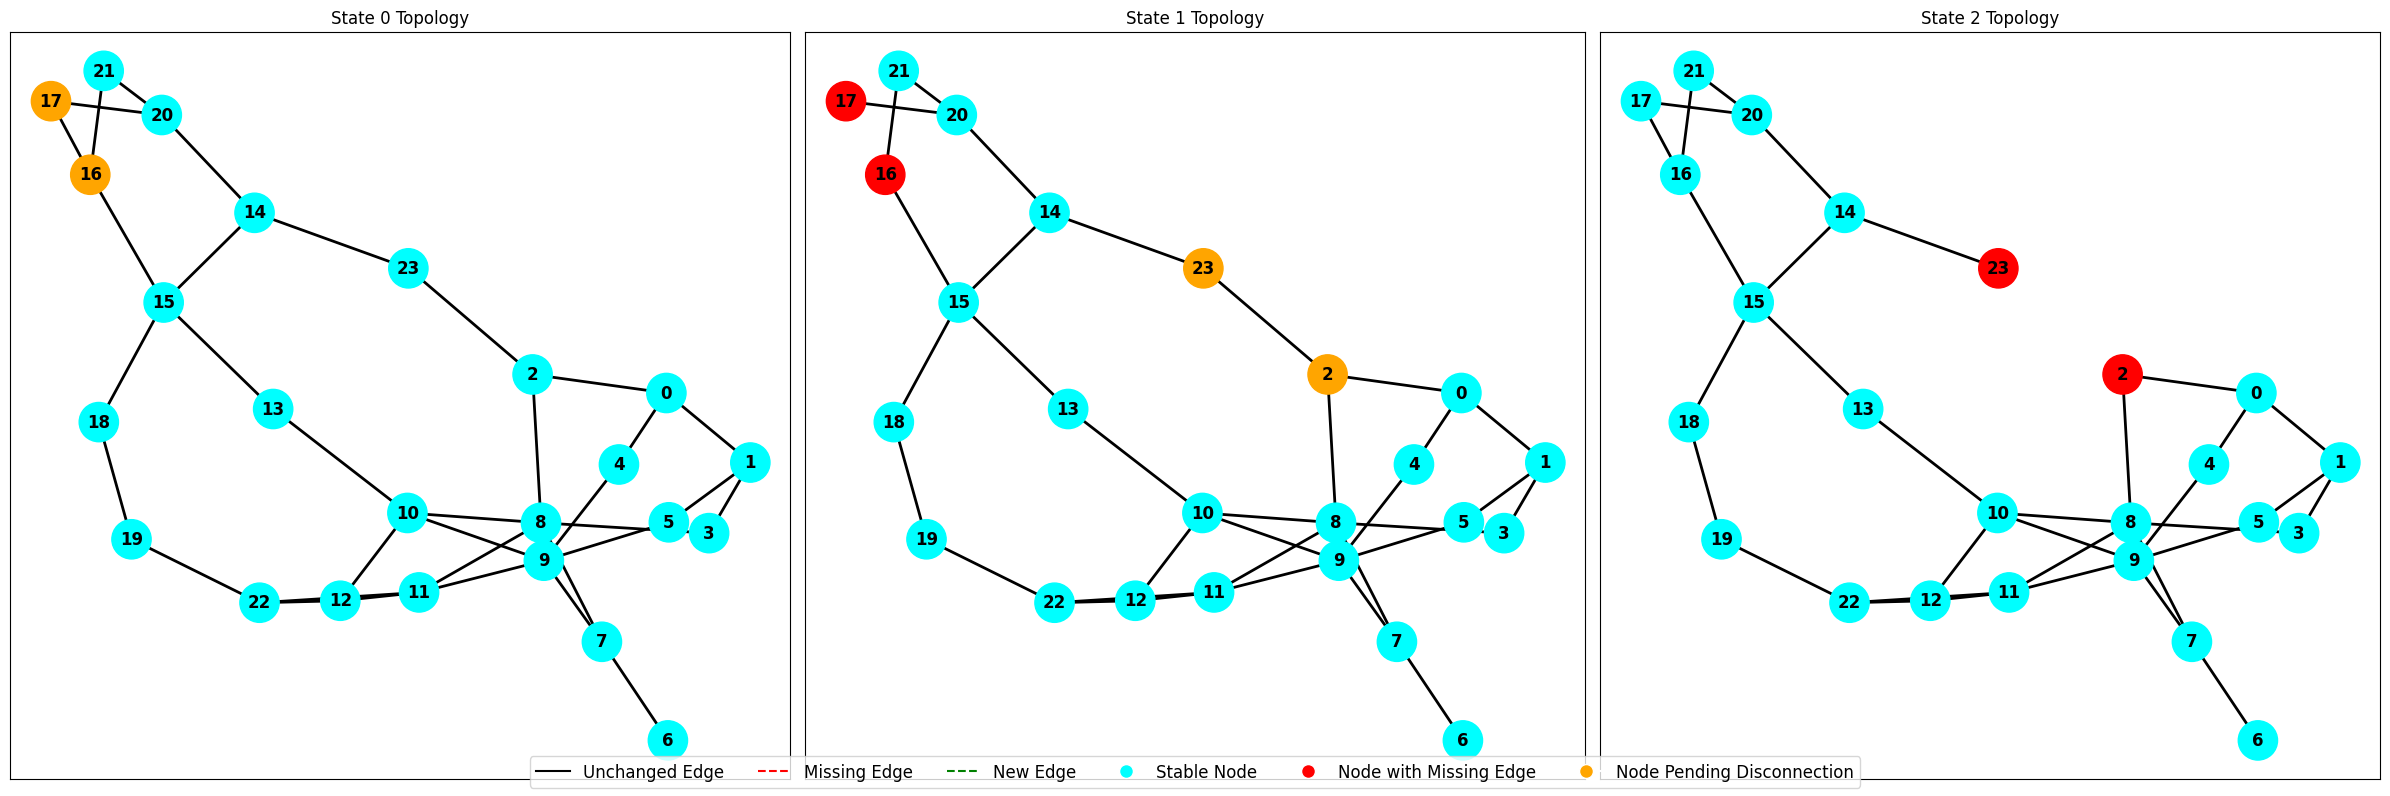

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges):
    """
    Visualize State 0, State 1, and State 2 topologies side by side, highlighting missing edges,
    pending disconnections (orange nodes), and new edges (green).
    Args:
        state_0_edges: Edge list for State 0.
        state_1_edges: Edge list for State 1.
        state_2_edges: Edge list for State 2.
    """
    # Create graphs for each state
    graph_0 = nx.Graph()
    graph_0.add_edges_from(state_0_edges)

    graph_1 = nx.Graph()
    graph_1.add_edges_from(state_1_edges)

    graph_2 = nx.Graph()
    graph_2.add_edges_from(state_2_edges)

    # Compute missing and new edges between states
    missing_edges_01 = [edge for edge in state_0_edges if edge not in state_1_edges]
    missing_edges_12 = [edge for edge in state_1_edges if edge not in state_2_edges]
    new_edges_01 = [edge for edge in state_1_edges if edge not in state_0_edges]
    new_edges_12 = [edge for edge in state_2_edges if edge not in state_1_edges]

    # Identify nodes involved in missing edges for each transition
    missing_nodes_01 = set(node for edge in missing_edges_01 for node in edge)
    missing_nodes_12 = set(node for edge in missing_edges_12 for node in edge)

    # Identify nodes pending disconnection in the next state
    pending_disconnection_nodes_01 = missing_nodes_01.intersection(graph_0.nodes)
    pending_disconnection_nodes_12 = missing_nodes_12.intersection(graph_1.nodes)

    # Define node colors for each state
    def get_node_colors(graph, current_missing_nodes, next_missing_nodes):
        colors = []
        for node in graph.nodes:
            if node in current_missing_nodes:
                colors.append('red')  # Nodes disconnected in the current state
            elif node in next_missing_nodes:
                colors.append('orange')  # Nodes pending disconnection in the next state
            else:
                colors.append('cyan')  # Stable nodes
        return colors

    node_colors_0 = get_node_colors(graph_0, set(), pending_disconnection_nodes_01)  # No missing nodes yet
    node_colors_1 = get_node_colors(graph_1, missing_nodes_01, pending_disconnection_nodes_12)
    node_colors_2 = get_node_colors(graph_2, missing_nodes_12, set())  # No pending disconnection in State 2

    # Define edge styles for each state
    def get_edge_styles(graph, missing_edges, new_edges):
        edge_colors = []
        edge_styles = []
        for edge in graph.edges:
            if edge in missing_edges or (edge[1], edge[0]) in missing_edges:
                edge_colors.append('red')  # Missing edges
                edge_styles.append('dashed')  # Dashed red line
            elif edge in new_edges or (edge[1], edge[0]) in new_edges:
                edge_colors.append('green')  # New edges
                edge_styles.append('dashed')  # Dashed green line
            else:
                edge_colors.append('black')  # Stable edges
                edge_styles.append('solid')  # Solid black line
        return edge_colors, edge_styles

    edge_colors_0, edge_styles_0 = ['black'] * len(graph_0.edges), ['solid'] * len(graph_0.edges)  # State 0 has no changes
    edge_colors_1, edge_styles_1 = get_edge_styles(graph_1, missing_edges_01, new_edges_01)
    edge_colors_2, edge_styles_2 = get_edge_styles(graph_2, missing_edges_12, new_edges_12)

    # Plot the graphs
    plt.figure(figsize=(24, 8))

    # Helper function to draw graph with edge styles
    def draw_graph(graph, pos, node_colors, edge_colors, edge_styles, title):
        for edge, color, style in zip(graph.edges, edge_colors, edge_styles):
            nx.draw_networkx_edges(graph, pos, edgelist=[edge], edge_color=color, style=style, width=2)
        nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=800)
        nx.draw_networkx_labels(graph, pos, font_size=12, font_weight='bold')
        plt.title(title)

    # Generate consistent positions for nodes
    pos = nx.spring_layout(graph_0, seed=42)

    # State 0
    plt.subplot(1, 3, 1)
    draw_graph(graph_0, pos, node_colors_0, edge_colors_0, edge_styles_0, "State 0 Topology")

    # State 1
    plt.subplot(1, 3, 2)
    draw_graph(graph_1, pos, node_colors_1, edge_colors_1, edge_styles_1, "State 1 Topology")

    # State 2
    plt.subplot(1, 3, 3)
    draw_graph(graph_2, pos, node_colors_2, edge_colors_2, edge_styles_2, "State 2 Topology")

    # Add legend
    plt.figlegend(
        handles=[
            plt.Line2D([0], [0], color='black', linestyle='solid', label='Unchanged Edge'),
            plt.Line2D([0], [0], color='red', linestyle='dashed', label='Missing Edge'),
            plt.Line2D([0], [0], color='green', linestyle='dashed', label='New Edge'),
            plt.Line2D([0], [0], marker='o', color='w', label='Stable Node', markerfacecolor='cyan', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Node with Missing Edge', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Node Pending Disconnection', markerfacecolor='orange', markersize=10),
        ],
        loc='lower center', ncol=6, fontsize=12
    )

    plt.tight_layout()
    plt.show()


# Example usage
state_index_0 = 0
state_index_1 = 1
state_index_2 = 2

# Assuming `data.edge_index` and `metadata` are predefined as per your dataset structure
state_0_edges = data.edge_index[:, metadata['edge_index'][state_index_0]:metadata['edge_index'][state_index_0 + 1]].t().tolist()
state_1_edges = data.edge_index[:, metadata['edge_index'][state_index_1]:metadata['edge_index'][state_index_1 + 1]].t().tolist()
state_2_edges = data.edge_index[:, metadata['edge_index'][state_index_2]:metadata['edge_index'][state_index_2 + 1]].t().tolist()

# Visualize all three states with missing edges highlighted
plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges)


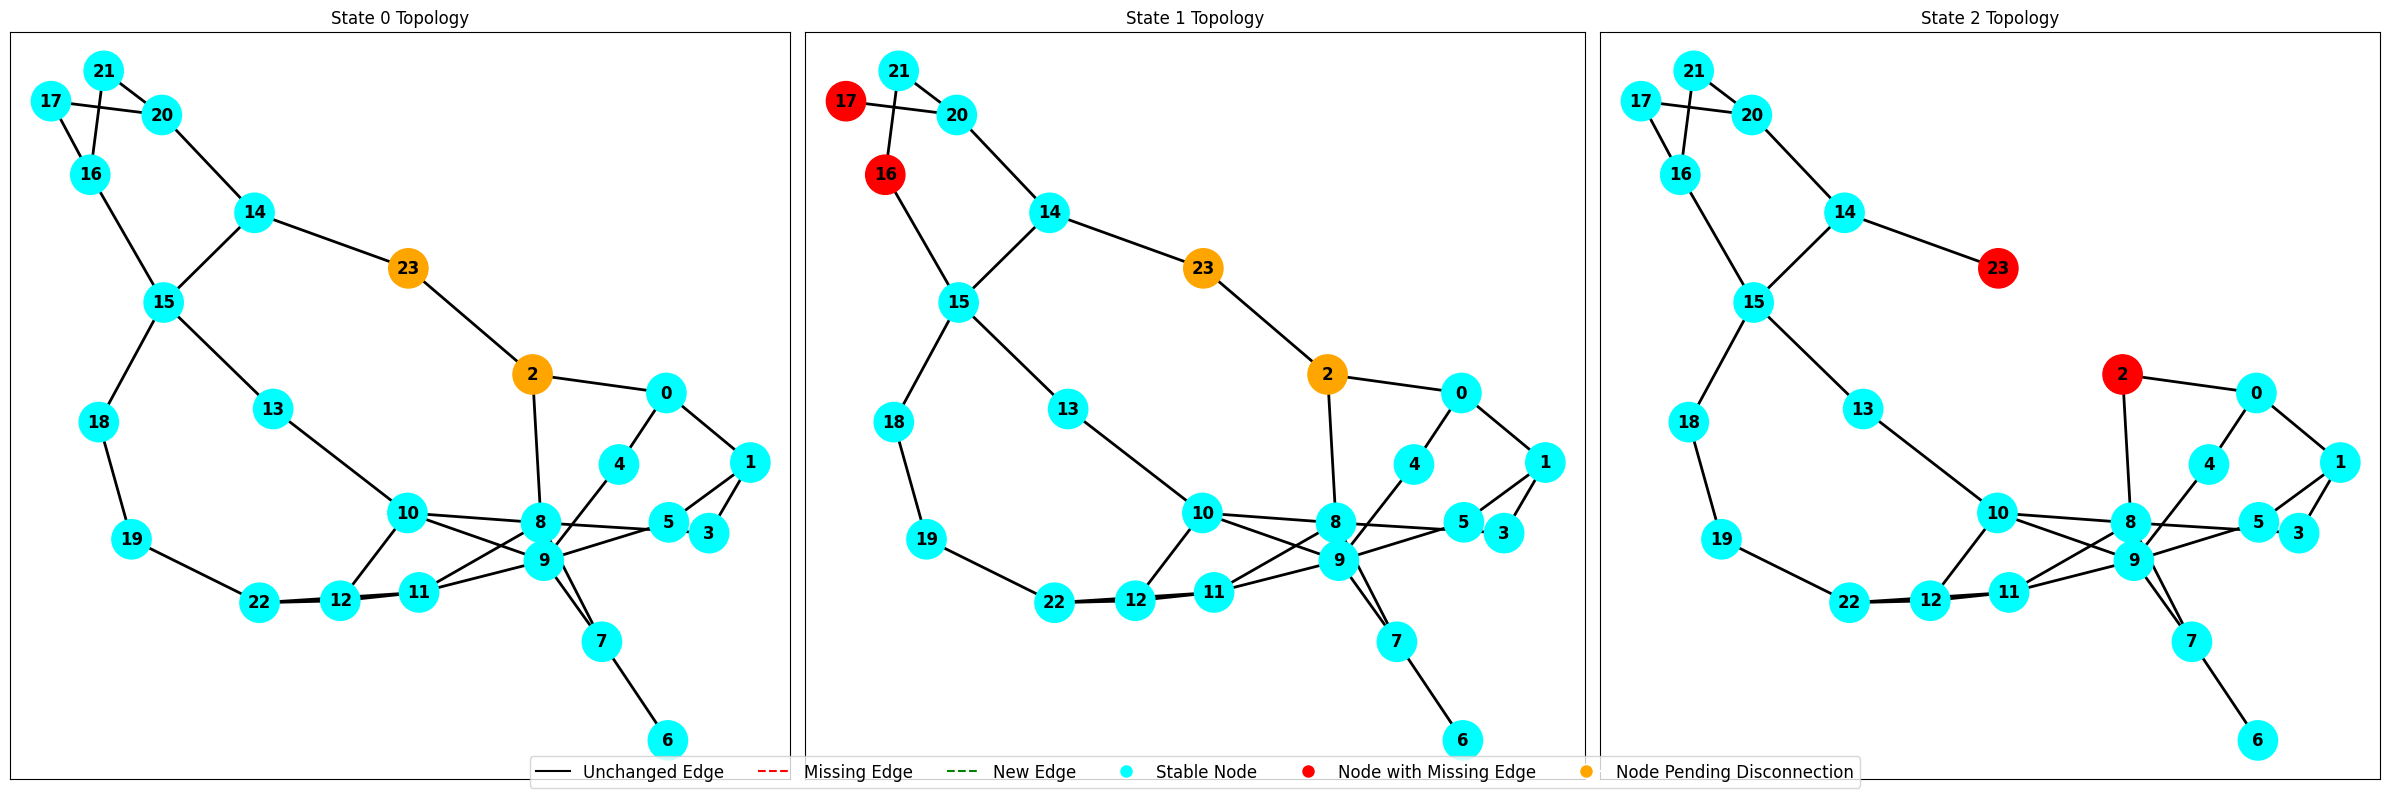

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges):
    """
    Visualize State 0, State 1, and State 2 topologies side by side, highlighting missing edges,
    pending disconnections (orange nodes), and new edges (green).
    Args:
        state_0_edges: Edge list for State 0.
        state_1_edges: Edge list for State 1.
        state_2_edges: Edge list for State 2.
    """
    # Create graphs for each state
    graph_0 = nx.Graph()
    graph_0.add_edges_from(state_0_edges)

    graph_1 = nx.Graph()
    graph_1.add_edges_from(state_1_edges)

    graph_2 = nx.Graph()
    graph_2.add_edges_from(state_2_edges)

    # Compute missing and new edges between states
    missing_edges_01 = [edge for edge in state_0_edges if edge not in state_1_edges]
    missing_edges_12 = [edge for edge in state_1_edges if edge not in state_2_edges]
    new_edges_01 = [edge for edge in state_1_edges if edge not in state_0_edges]
    new_edges_12 = [edge for edge in state_2_edges if edge not in state_1_edges]

    # Identify nodes involved in missing edges for each transition
    missing_nodes_01 = set(node for edge in missing_edges_01 for node in edge)
    missing_nodes_12 = set(node for edge in missing_edges_12 for node in edge)

    # Identify nodes pending disconnection in the next state
    pending_disconnection_nodes_01 = missing_nodes_12.intersection(graph_1.nodes)
    pending_disconnection_nodes_12 = missing_nodes_12.intersection(graph_2.nodes)

    # Define node colors for each state
    def get_node_colors(graph, missing_nodes, pending_disconnection_nodes):
        colors = []
        for node in graph.nodes:
            if node in missing_nodes:
                colors.append('red')  # Nodes with missing edges in the current state
            elif node in pending_disconnection_nodes:
                colors.append('orange')  # Nodes pending disconnection in the next state
            else:
                colors.append('cyan')  # Stable nodes
        return colors

    node_colors_0 = get_node_colors(graph_0, set(), pending_disconnection_nodes_01)  # State 0 has no missing edges
    node_colors_1 = get_node_colors(graph_1, missing_nodes_01, pending_disconnection_nodes_12)
    node_colors_2 = get_node_colors(graph_2, missing_nodes_12, set())  # State 2 has no pending disconnection

    # Define edge styles for each state
    def get_edge_styles(graph, missing_edges, new_edges):
        edge_colors = []
        edge_styles = []
        for edge in graph.edges:
            if edge in missing_edges or (edge[1], edge[0]) in missing_edges:
                edge_colors.append('red')  # Missing edges
                edge_styles.append('dashed')  # Dashed red line
            elif edge in new_edges or (edge[1], edge[0]) in new_edges:
                edge_colors.append('green')  # New edges
                edge_styles.append('dashed')  # Dashed green line
            else:
                edge_colors.append('black')  # Stable edges
                edge_styles.append('solid')  # Solid black line
        return edge_colors, edge_styles

    edge_colors_0, edge_styles_0 = ['black'] * len(graph_0.edges), ['solid'] * len(graph_0.edges)  # State 0 has no changes
    edge_colors_1, edge_styles_1 = get_edge_styles(graph_1, missing_edges_01, new_edges_01)
    edge_colors_2, edge_styles_2 = get_edge_styles(graph_2, missing_edges_12, new_edges_12)

    # Plot the graphs
    plt.figure(figsize=(24, 8))

    # Helper function to draw graph with edge styles
    def draw_graph(graph, pos, node_colors, edge_colors, edge_styles, title):
        for edge, color, style in zip(graph.edges, edge_colors, edge_styles):
            nx.draw_networkx_edges(graph, pos, edgelist=[edge], edge_color=color, style=style, width=2)
        nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=800)
        nx.draw_networkx_labels(graph, pos, font_size=12, font_weight='bold')
        plt.title(title)

    # Generate consistent positions for nodes
    pos = nx.spring_layout(graph_0, seed=42)

    # State 0
    plt.subplot(1, 3, 1)
    draw_graph(graph_0, pos, node_colors_0, edge_colors_0, edge_styles_0, "State 0 Topology")

    # State 1
    plt.subplot(1, 3, 2)
    draw_graph(graph_1, pos, node_colors_1, edge_colors_1, edge_styles_1, "State 1 Topology")

    # State 2
    plt.subplot(1, 3, 3)
    draw_graph(graph_2, pos, node_colors_2, edge_colors_2, edge_styles_2, "State 2 Topology")

    # Add legend
    plt.figlegend(
        handles=[
            plt.Line2D([0], [0], color='black', linestyle='solid', label='Unchanged Edge'),
            plt.Line2D([0], [0], color='red', linestyle='dashed', label='Missing Edge'),
            plt.Line2D([0], [0], color='green', linestyle='dashed', label='New Edge'),
            plt.Line2D([0], [0], marker='o', color='w', label='Stable Node', markerfacecolor='cyan', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Node with Missing Edge', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='Node Pending Disconnection', markerfacecolor='orange', markersize=10),
        ],
        loc='lower center', ncol=6, fontsize=12
    )

    plt.tight_layout()
    plt.show()


# Example usage
state_index_0 = 0
state_index_1 = 1
state_index_2 = 2

# Assuming `data.edge_index` and `metadata` are predefined as per your dataset structure
state_0_edges = data.edge_index[:, metadata['edge_index'][state_index_0]:metadata['edge_index'][state_index_0 + 1]].t().tolist()
state_1_edges = data.edge_index[:, metadata['edge_index'][state_index_1]:metadata['edge_index'][state_index_1 + 1]].t().tolist()
state_2_edges = data.edge_index[:, metadata['edge_index'][state_index_2]:metadata['edge_index'][state_index_2 + 1]].t().tolist()

# Visualize all three states with missing edges highlighted
plot_states_with_missing_edges_3states(state_0_edges, state_1_edges, state_2_edges)


In [ ]:
### Generate the Labels (Logic)
def generate_edge_labels(data, metadata):
    """
    Generate edge labels for consecutive states.
    Edge labels:
    - 0: Edge is active in the next state.
    - 1: Edge is missing in the next state (failed).
    Note: The final state does not generate labels as it has no "next state."
    """
    num_states = len(metadata['idx']) - 1  # Total number of states
    edge_labels = []

    for state_index in range(num_states - 1):  # Exclude the final state
        # Extract edges for current and next states
        start_current, end_current = metadata['edge_index'][state_index], metadata['edge_index'][state_index + 1]
        start_next, end_next = metadata['edge_index'][state_index + 1], metadata['edge_index'][state_index + 2]

        edges_current = data.edge_index[:, start_current:end_current]
        edges_next = data.edge_index[:, start_next:end_next]

        # Convert edges to sets for comparison
        edges_current_set = set(map(tuple, edges_current.t().tolist()))
        edges_next_set = set(map(tuple, edges_next.t().tolist()))

        # Create labels for edges in the current state
        labels = {edge: 0 for edge in edges_current_set}  # Default to active (0)
        for edge in edges_current_set - edges_next_set:  # Mark failed edges
            labels[edge] = 1

        edge_labels.append(labels)

    # Optionally handle the final state (add placeholder labels if necessary)
    edge_labels.append({})  # Placeholder for the final state (if required)

    return edge_labels

# Generate edge labels
edge_labels = generate_edge_labels(data, metadata)
print(f"Generated edge labels for {len(edge_labels)} states (excluding the final state's next-state dependency).")


In [ ]:
#### Dataset Creation (Adaption for the edge level task)
from torch_geometric.data import Data
import torch

def integrate_edge_labels(data, metadata, edge_labels):
    """
    Integrate edge labels into the dataset for edge-level tasks.
    Args:
        data: Original dataset (data.pt).
        metadata: Metadata from the original dataset.
        edge_labels: Generated edge labels.
    Returns:
        A list of torch_geometric.data.Data objects with edge-level labels.
    """
    processed_dataset = []  # New dataset for edge-level tasks
    num_states = len(metadata['idx']) - 1

    for state_index in range(num_states - 1):  # Process all states except the last
        # Extract edges for the current state
        start_edge = metadata['edge_index'][state_index]
        end_edge = metadata['edge_index'][state_index + 1]
        edges = data.edge_index[:, start_edge:end_edge]

        # Extract edge attributes
        start_attr = metadata['edge_attr'][state_index]
        end_attr = metadata['edge_attr'][state_index + 1]
        edge_attributes = data.edge_attr[start_attr:end_attr]

        # Extract node features
        start_node = metadata['x'][state_index]
        end_node = metadata['x'][state_index + 1]
        node_features = data.x[start_node:end_node]

        # Map labels to edges
        labels_dict = edge_labels[state_index]
        labels = [labels_dict[tuple(edge)] for edge in edges.t().tolist()]
        edge_labels_tensor = torch.tensor(labels, dtype=torch.long)

        # Create a new Data object
        state_data = Data(
            x=node_features,
            edge_index=edges,
            edge_attr=edge_attributes,
            y=edge_labels_tensor  # Edge labels
        )
        processed_dataset.append(state_data)

    return processed_dataset

# Integrate edge labels into the dataset
processed_dataset = integrate_edge_labels(data, metadata, edge_labels)

# Save the processed dataset
dataset_path1 = "edge_dataset_with_labels.pt"
torch.save(processed_dataset, dataset_path1)
print(f"Processed dataset saved to: {dataset_path1}")
